#### Import and load dataset

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from catboost import CatBoostClassifier

In [69]:
df = pd.read_csv('../data/Loan_approval_data_2025.csv')
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


#### Exploratory Data Analysis (EDA)

In [70]:
df.dtypes

customer_id                 object
age                          int64
occupation_status           object
years_employed             float64
annual_income                int64
credit_score                 int64
credit_history_years       float64
savings_assets               int64
current_debt                 int64
defaults_on_file             int64
delinquencies_last_2yrs      int64
derogatory_marks             int64
product_type                object
loan_intent                 object
loan_amount                  int64
interest_rate              float64
debt_to_income_ratio       float64
loan_to_income_ratio       float64
payment_to_income_ratio    float64
loan_status                  int64
dtype: object

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50000.0,34.957060,11.118603,18.000,26.000,35.000,43.00000,70.000
years_employed,50000.0,7.454868,7.612097,0.000,1.300,4.900,11.40000,39.900
annual_income,50000.0,50062.892040,32630.501014,15000.000,27280.500,41607.500,62723.25000,250000.000
credit_score,50000.0,643.614820,64.731518,348.000,600.000,643.000,687.00000,850.000
credit_history_years,50000.0,8.168274,7.207552,0.000,2.000,6.100,12.60000,30.000
savings_assets,50000.0,3595.619400,13232.399398,0.000,130.000,568.000,2271.00000,300000.000
current_debt,50000.0,14290.442220,13243.757493,60.000,5581.000,10385.000,18449.25000,163344.000
defaults_on_file,50000.0,0.053480,0.224991,0.000,0.000,0.000,0.00000,1.000
delinquencies_last_2yrs,50000.0,0.554640,0.845050,0.000,0.000,0.000,1.00000,9.000
derogatory_marks,50000.0,0.147640,0.412996,0.000,0.000,0.000,0.00000,4.000


In [72]:
df.loan_status.value_counts()

loan_status
1    27523
0    22477
Name: count, dtype: int64

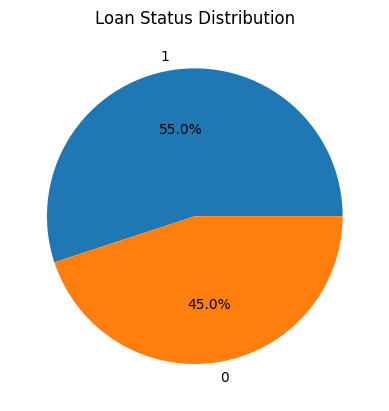

In [73]:
df.loan_status.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

In [74]:
df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

In [75]:
numerical = [
    'age', 
    'years_employed', 
    'annual_income', 
    'credit_score', 
    'credit_history_years', 
    'savings_assets',
    'current_debt',
    'delinquencies_last_2yrs',
    'derogatory_marks',
    'loan_amount',
    'interest_rate',
    'debt_to_income_ratio',
    'loan_to_income_ratio',
    'payment_to_income_ratio'
 ]

categorical = [
    'occupation_status',
    'defaults_on_file',
    'product_type',
    'loan_intent'
]

In [76]:
loan_approval_rate = df.loan_status.mean()
loan_approval_rate

np.float64(0.55046)

In [77]:
for c in categorical:
    df_group = df.groupby(c).loan_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - loan_approval_rate
    df_group['risk'] = df_group['mean'] - loan_approval_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
occupation_status,,,,
Employed,0.543565,34971,-0.006895,-0.006895
Self-Employed,0.569113,10179,0.018653,0.018653
Student,0.561031,4850,0.010571,0.010571


,mean,count,diff,risk
defaults_on_file,,,,
0,0.581562,47326,0.031102,0.031102
1,0.000000,2674,-0.550460,-0.550460


,mean,count,diff,risk
product_type,,,,
Credit Card,0.613226,22455,0.062766,0.062766
Line of Credit,0.532429,10022,-0.018031,-0.018031
Personal Loan,0.480340,17523,-0.070120,-0.070120


,mean,count,diff,risk
loan_intent,,,,
Business,0.443433,7469,-0.107027,-0.107027
Debt Consolidation,0.366484,4917,-0.183976,-0.183976
Education,0.675054,10134,0.124594,0.124594
Home Improvement,0.535221,7453,-0.015239,-0.015239
Medical,0.528955,7598,-0.021505,-0.021505
Personal,0.608255,12429,0.057795,0.057795


In [78]:
for c in numerical:
    df_group = df.groupby(c).loan_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - loan_approval_rate
    df_group['risk'] = df_group['mean'] - loan_approval_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
age,,,,
18,0.252521,4562,-0.297939,-0.297939
19,0.271329,715,-0.279131,-0.279131
20,0.302021,841,-0.248439,-0.248439
21,0.357714,875,-0.192746,-0.192746
22,0.323625,927,-0.226835,-0.226835
23,0.352666,1069,-0.197794,-0.197794
24,0.411248,1138,-0.139212,-0.139212
25,0.425332,1279,-0.125128,-0.125128
26,0.418110,1270,-0.132350,-0.132350


,mean,count,diff,risk
years_employed,,,,
0.0,0.240532,3459,-0.309928,-0.309928
0.1,0.426598,579,-0.123862,-0.123862
0.2,0.418605,516,-0.131855,-0.131855
0.3,0.424581,537,-0.125879,-0.125879
0.4,0.461670,587,-0.088790,-0.088790
...,...,...,...,...
39.4,0.500000,4,-0.050460,-0.050460
39.5,1.000000,7,0.449540,0.449540
39.6,0.500000,2,-0.050460,-0.050460


,mean,count,diff,risk
annual_income,,,,
15000,0.449319,2644,-0.101141,-0.101141
15001,0.000000,1,-0.550460,-0.550460
15005,0.000000,1,-0.550460,-0.550460
15007,0.000000,2,-0.550460,-0.550460
15008,0.000000,2,-0.550460,-0.550460
...,...,...,...,...
247835,1.000000,1,0.449540,0.449540
248250,1.000000,1,0.449540,0.449540
248846,1.000000,1,0.449540,0.449540


,mean,count,diff,risk
credit_score,,,,
348,0.000000,1,-0.550460,-0.550460
375,0.000000,1,-0.550460,-0.550460
396,1.000000,1,0.449540,0.449540
401,0.000000,1,-0.550460,-0.550460
402,0.000000,1,-0.550460,-0.550460
...,...,...,...,...
846,0.000000,1,-0.550460,-0.550460
847,1.000000,1,0.449540,0.449540
848,1.000000,1,0.449540,0.449540


,mean,count,diff,risk
credit_history_years,,,,
0.0,0.268212,302,-0.282248,-0.282248
0.1,0.288925,623,-0.261535,-0.261535
0.2,0.297561,615,-0.252899,-0.252899
0.3,0.274603,630,-0.275857,-0.275857
0.4,0.288431,631,-0.262029,-0.262029
...,...,...,...,...
29.6,0.740741,27,0.190281,0.190281
29.7,0.684211,19,0.133751,0.133751
29.8,0.789474,19,0.239014,0.239014


,mean,count,diff,risk
savings_assets,,,,
0,0.257471,435,-0.292989,-0.292989
1,0.268571,175,-0.281889,-0.281889
2,0.250000,172,-0.300460,-0.300460
3,0.300000,200,-0.250460,-0.250460
4,0.299465,187,-0.250995,-0.250995
...,...,...,...,...
277132,1.000000,1,0.449540,0.449540
283066,1.000000,1,0.449540,0.449540
289182,1.000000,1,0.449540,0.449540


,mean,count,diff,risk
current_debt,,,,
60,0.0,1,-0.55046,-0.55046
64,0.5,2,-0.05046,-0.05046
76,0.0,1,-0.55046,-0.55046
85,1.0,1,0.44954,0.44954
95,0.0,1,-0.55046,-0.55046
...,...,...,...,...
135855,0.0,1,-0.55046,-0.55046
136126,0.0,1,-0.55046,-0.55046
141738,0.0,1,-0.55046,-0.55046


,mean,count,diff,risk
delinquencies_last_2yrs,,,,
0,0.655908,30797,0.105448,0.105448
1,0.465077,13043,-0.085383,-0.085383
2,0.285747,4399,-0.264713,-0.264713
3,0.000000,1280,-0.550460,-0.550460
4,0.000000,384,-0.550460,-0.550460
5,0.000000,77,-0.550460,-0.550460
6,0.000000,13,-0.550460,-0.550460
7,0.000000,5,-0.550460,-0.550460
8,0.000000,1,-0.550460,-0.550460


,mean,count,diff,risk
derogatory_marks,,,,
0,0.592497,43607,0.042037,0.042037
1,0.293266,5524,-0.257194,-0.257194
2,0.083113,758,-0.467347,-0.467347
3,0.029412,102,-0.521048,-0.521048
4,0.000000,9,-0.550460,-0.550460


,mean,count,diff,risk
loan_amount,,,,
500,0.620690,116,0.070230,0.070230
600,0.585366,41,0.034906,0.034906
700,0.846154,39,0.295694,0.295694
800,0.714286,42,0.163826,0.163826
900,0.636364,44,0.085904,0.085904
...,...,...,...,...
99600,0.400000,5,-0.150460,-0.150460
99700,0.750000,4,0.199540,0.199540
99800,0.000000,1,-0.550460,-0.550460


,mean,count,diff,risk
interest_rate,,,,
6.00,1.000000,1,0.449540,0.449540
6.02,1.000000,4,0.449540,0.449540
6.03,0.000000,1,-0.550460,-0.550460
6.04,1.000000,3,0.449540,0.449540
6.05,1.000000,1,0.449540,0.449540
...,...,...,...,...
22.96,0.375000,32,-0.175460,-0.175460
22.97,0.090909,22,-0.459551,-0.459551
22.98,0.285714,21,-0.264746,-0.264746


,mean,count,diff,risk
debt_to_income_ratio,,,,
0.002,0.250000,4,-0.300460,-0.300460
0.003,0.750000,4,0.199540,0.199540
0.004,0.428571,7,-0.121889,-0.121889
0.005,0.750000,8,0.199540,0.199540
0.006,0.769231,13,0.218771,0.218771
...,...,...,...,...
0.796,0.000000,1,-0.550460,-0.550460
0.797,0.000000,2,-0.550460,-0.550460
0.798,0.000000,3,-0.550460,-0.550460


,mean,count,diff,risk
loan_to_income_ratio,,,,
0.008,0.000000,1,-0.550460,-0.550460
0.010,1.000000,5,0.449540,0.449540
0.011,1.000000,7,0.449540,0.449540
0.012,0.666667,15,0.116207,0.116207
0.013,0.823529,17,0.273069,0.273069
...,...,...,...,...
1.997,1.000000,2,0.449540,0.449540
1.998,0.333333,6,-0.217127,-0.217127
1.999,0.250000,4,-0.300460,-0.300460


,mean,count,diff,risk
payment_to_income_ratio,,,,
0.003,0.833333,6,0.282873,0.282873
0.004,0.794872,39,0.244412,0.244412
0.005,0.756757,37,0.206297,0.206297
0.006,0.719298,57,0.168838,0.168838
0.007,0.661538,65,0.111078,0.111078
...,...,...,...,...
0.663,0.000000,7,-0.550460,-0.550460
0.664,0.500000,14,-0.050460,-0.050460
0.665,0.111111,9,-0.439349,-0.439349


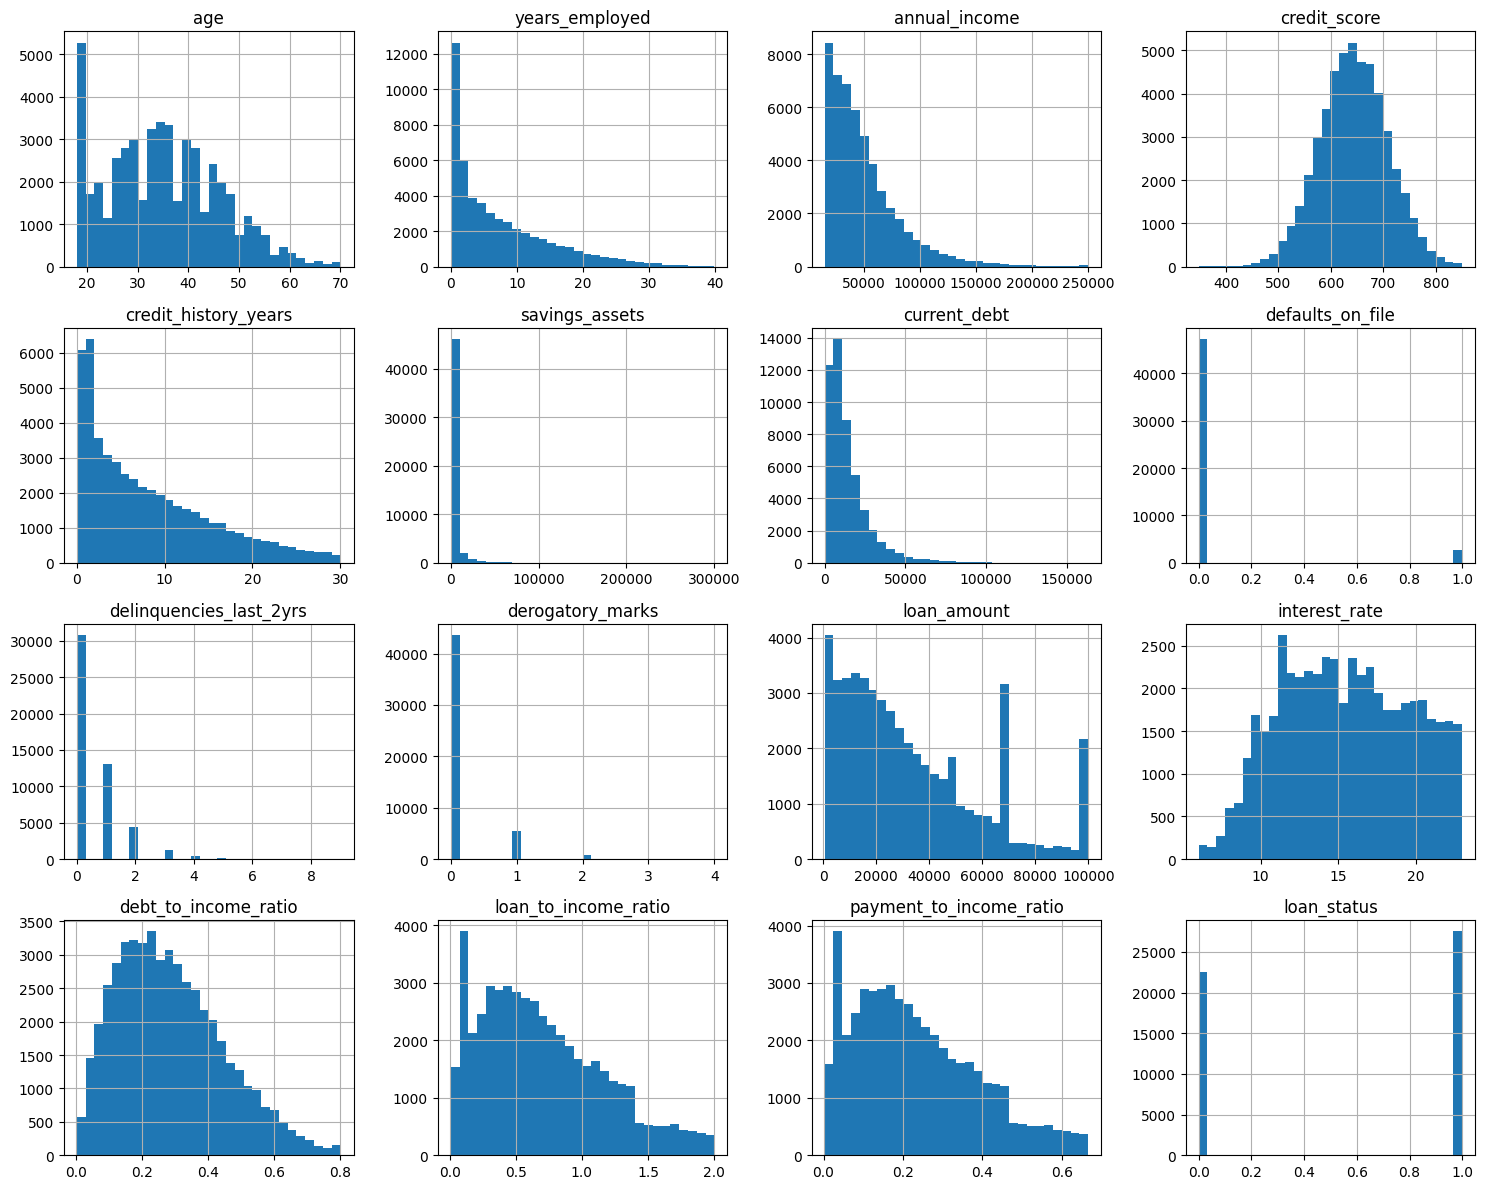

In [79]:
df.select_dtypes(include=['int64','float64']).hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()

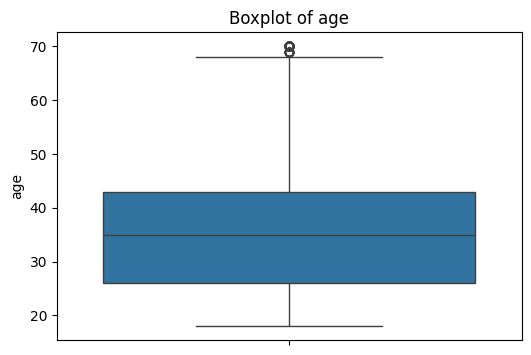

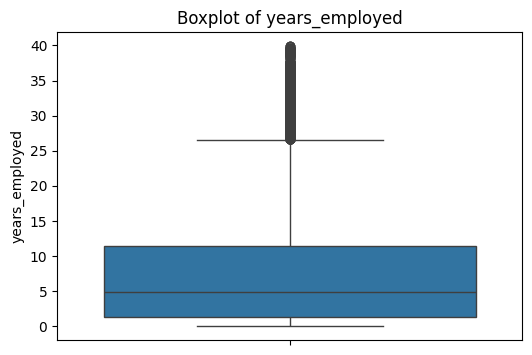

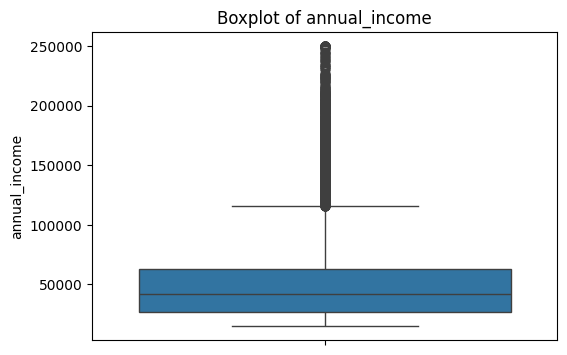

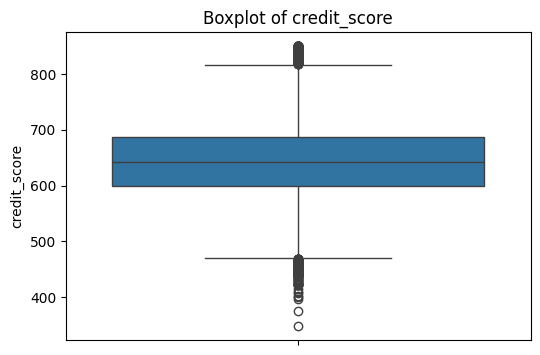

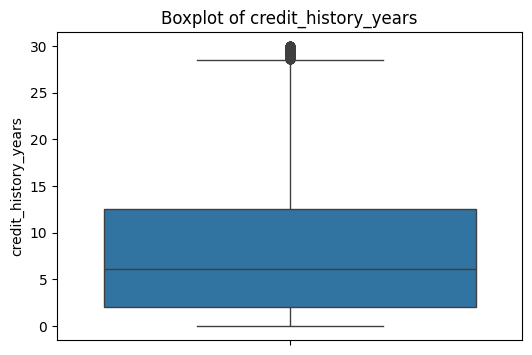

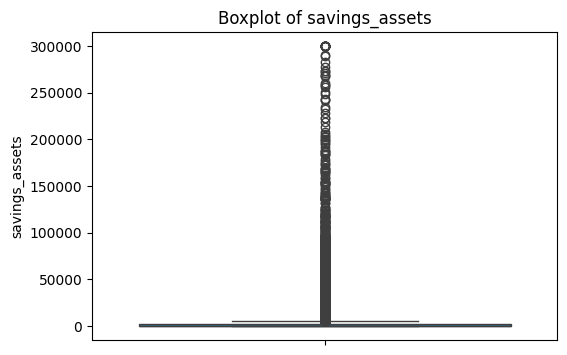

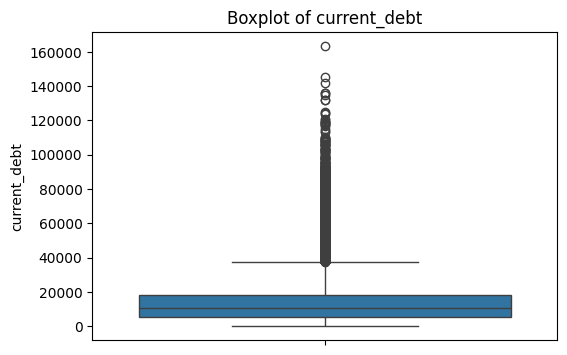

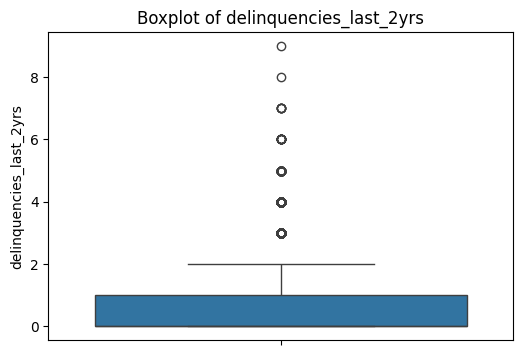

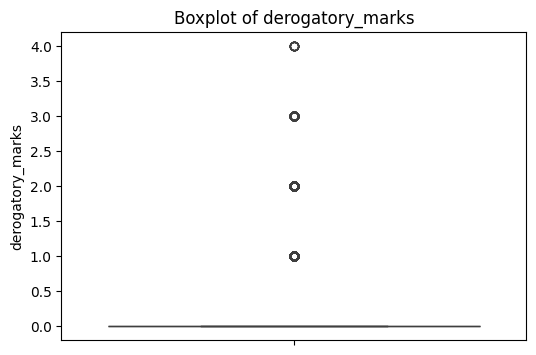

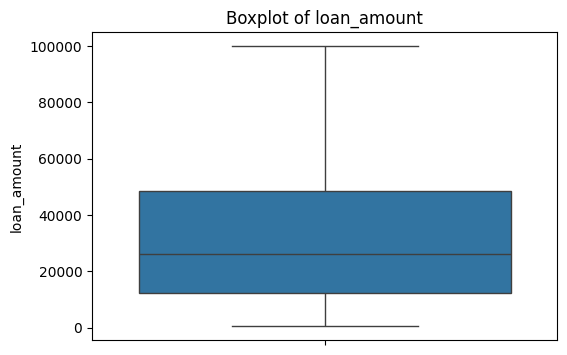

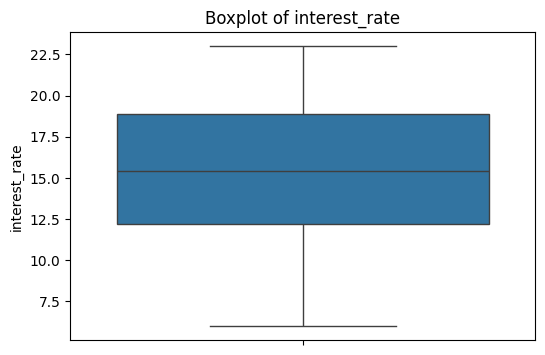

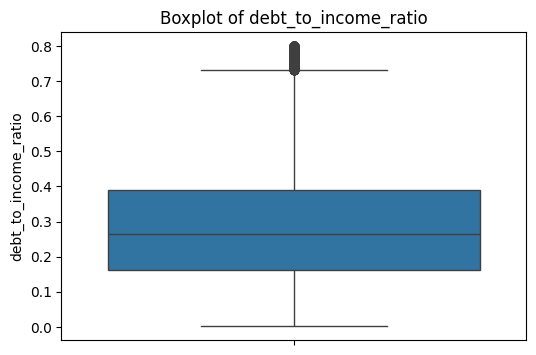

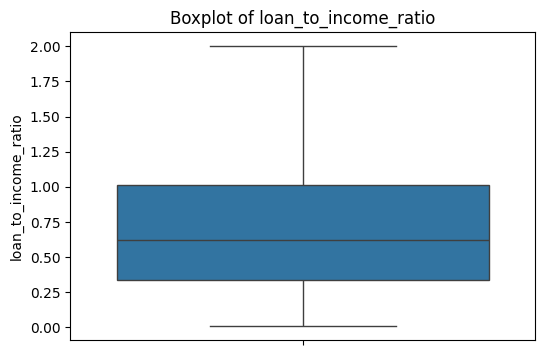

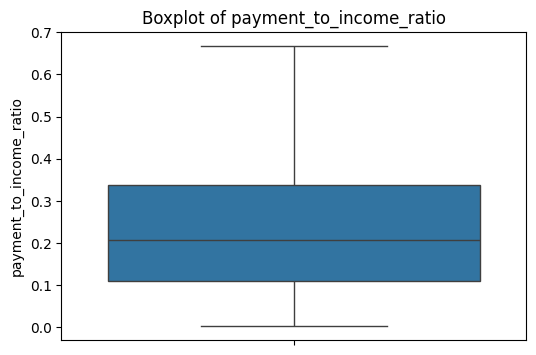

In [80]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

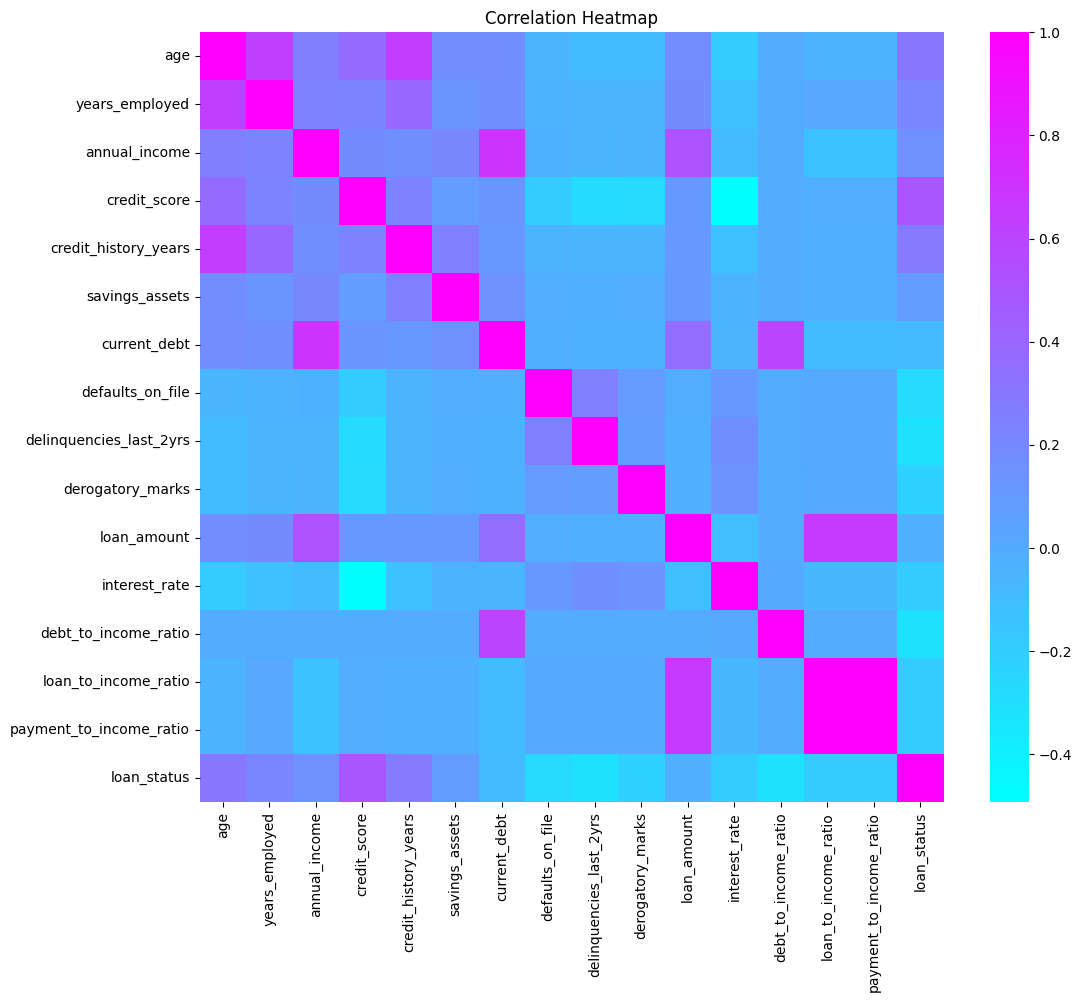

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

In [82]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status                1.000000
credit_score               0.496316
age                        0.311524
credit_history_years       0.277103
years_employed             0.218875
annual_income              0.158466
savings_assets             0.094789
loan_amount               -0.025987
current_debt              -0.088494
interest_rate             -0.185179
loan_to_income_ratio      -0.193252
payment_to_income_ratio   -0.193258
derogatory_marks          -0.224735
defaults_on_file          -0.263033
debt_to_income_ratio      -0.317363
delinquencies_last_2yrs   -0.318075
Name: loan_status, dtype: float64

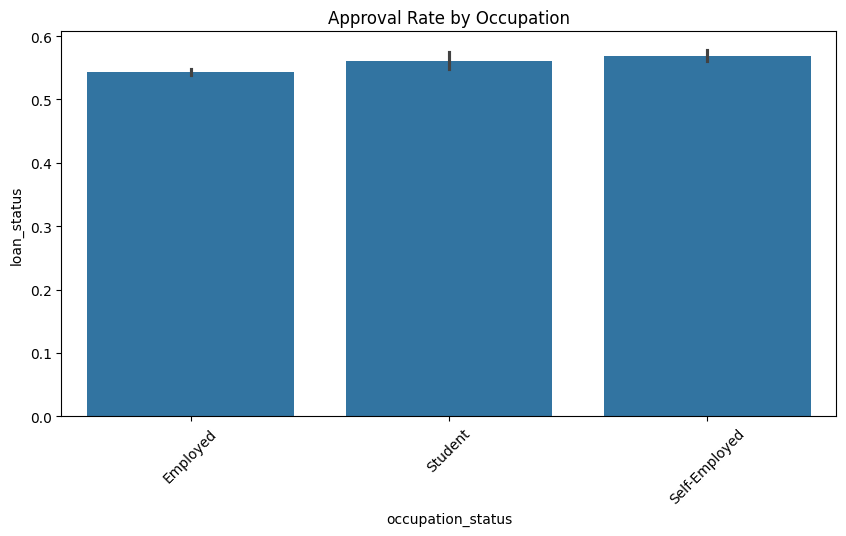

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='occupation_status',
    y='loan_status',
    data=df,
    estimator=lambda x: x.mean()
)
plt.xticks(rotation=45)
plt.title('Approval Rate by Occupation')
plt.show()

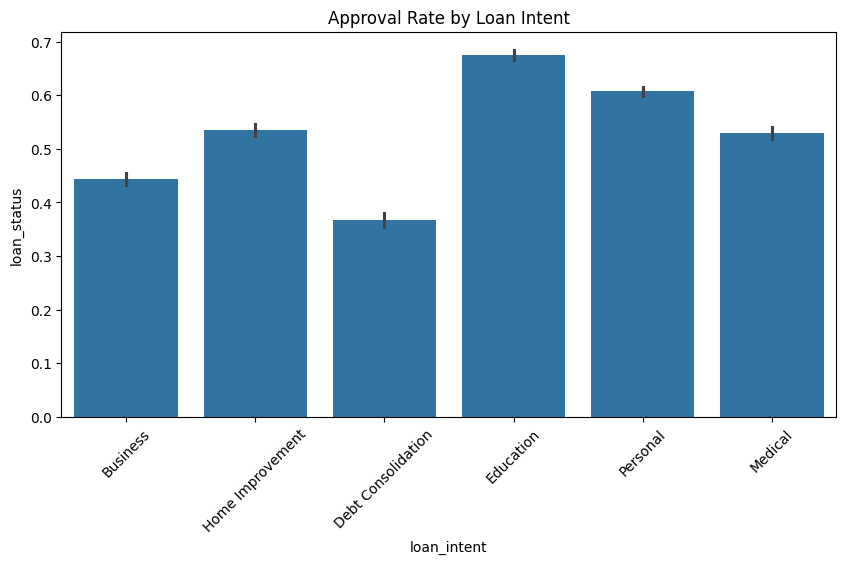

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='loan_intent',
    y='loan_status',
    data=df,
    estimator=lambda x: x.mean()
)
plt.xticks(rotation=45)
plt.title('Approval Rate by Loan Intent')
plt.show()

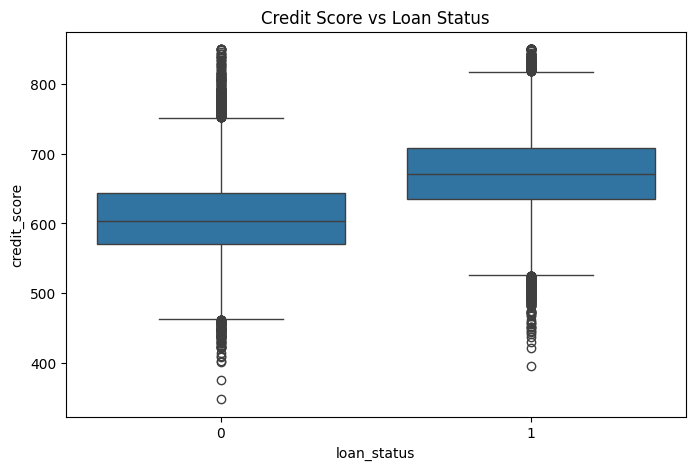

In [85]:
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title('Credit Score vs Loan Status')
plt.show()

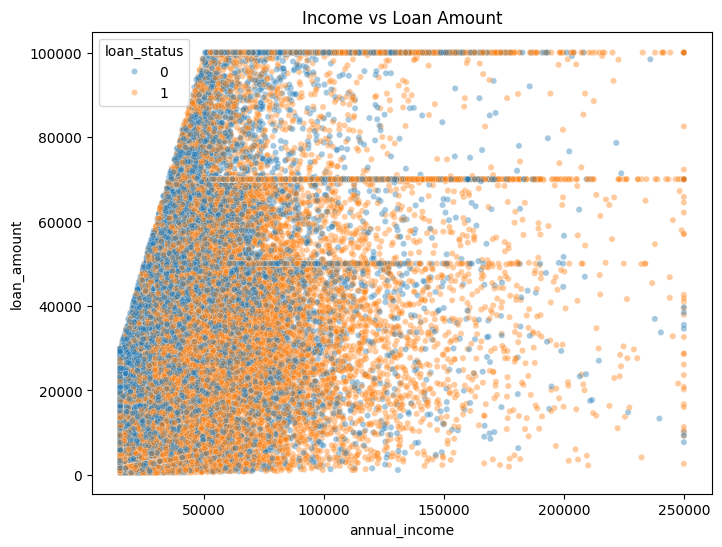

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='annual_income',
    y='loan_amount',
    hue='loan_status',
    data=df,
    alpha=0.4,
    s=20
)
plt.title('Income vs Loan Amount')
plt.show()

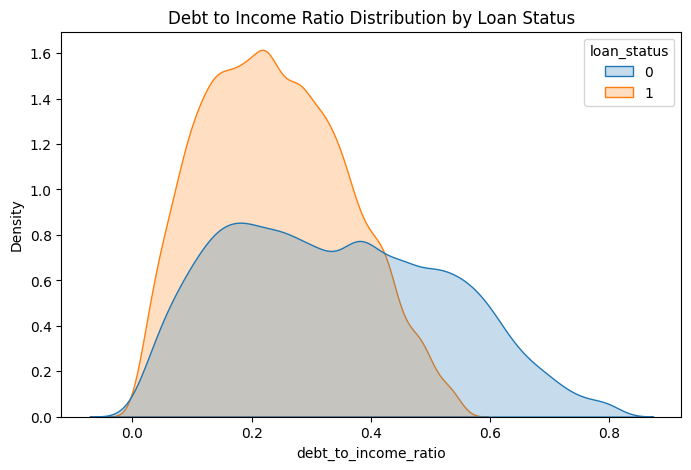

In [87]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df,
    x='debt_to_income_ratio',
    hue='loan_status',
    fill=True
)
plt.title('Debt to Income Ratio Distribution by Loan Status')
plt.show()

#### Train test split

In [88]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=11, stratify=df.loan_status)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=11, stratify=df_full_train.loan_status)

y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

X_train = df_train.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)
X_val = df_val.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)
X_test = df_test.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)

df_train.shape, df_val.shape, df_test.shape

((30000, 20), (10000, 20), (10000, 20))

#### Logistic Regression model

In [89]:
dv_lr = DictVectorizer(sparse=False)

X_train_lr = dv_lr.fit_transform(X_train[categorical + numerical].to_dict(orient='records'))
X_val_lr = dv_lr.transform(X_val[categorical + numerical].to_dict(orient='records'))
X_test_lr = dv_lr.transform(X_test[categorical + numerical].to_dict(orient='records'))

In [90]:
scaler_lr = StandardScaler()

X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_val_lr_scaled = scaler_lr.transform(X_val_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

In [91]:
dv_lr.get_feature_names_out()

array(['age', 'annual_income', 'credit_history_years', 'credit_score',
       'current_debt', 'debt_to_income_ratio', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'interest_rate',
       'loan_amount', 'loan_intent=Business',
       'loan_intent=Debt Consolidation', 'loan_intent=Education',
       'loan_intent=Home Improvement', 'loan_intent=Medical',
       'loan_intent=Personal', 'loan_to_income_ratio',
       'occupation_status=Employed', 'occupation_status=Self-Employed',
       'occupation_status=Student', 'payment_to_income_ratio',
       'product_type=Credit Card', 'product_type=Line of Credit',
       'product_type=Personal Loan', 'savings_assets', 'years_employed'],
      dtype=object)

In [92]:
model = LogisticRegression(solver='liblinear', random_state=11)
model.fit(X_train_lr_scaled, y_train)

model.coef_[0].round(3)

array([ 2.000e-03,  3.400e-01,  7.620e-01,  7.390e-01, -4.440e-01,
       -1.363e+00, -2.576e+00, -7.540e-01, -5.280e-01, -1.950e+00,
        1.080e-01, -3.710e-01, -5.820e-01,  6.060e-01, -9.500e-02,
       -7.200e-02,  2.850e-01, -4.870e-01, -2.100e-02, -9.000e-03,
        4.500e-02, -4.710e-01,  1.267e+00, -9.540e-01, -5.190e-01,
        9.400e-02,  3.400e-01])

In [93]:
model.predict_proba(X_train_lr_scaled)

array([[0.14415253, 0.85584747],
       [0.87522159, 0.12477841],
       [0.98056503, 0.01943497],
       ...,
       [0.93315967, 0.06684033],
       [0.11951717, 0.88048283],
       [0.98753723, 0.01246277]], shape=(30000, 2))

In [94]:
y_pred = model.predict_proba(X_val_lr_scaled)[:, 1]

In [95]:
approval_decision = (y_pred >= 0.5)
approval_decision.astype(int)

array([0, 0, 0, ..., 1, 1, 0], shape=(10000,))

In [96]:
(y_val == approval_decision).mean()

np.float64(0.8724)

In [97]:
roc_auc_score(y_val, y_pred)

0.9478001897354917

In [98]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = approval_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct_prediction'] = (df_pred.prediction == df_pred.actual)

df_pred

,probability,prediction,actual,correct_prediction
0,0.000053,0,0,True
1,0.193036,0,0,True
2,0.156981,0,1,False
3,0.939126,1,1,True
4,0.942305,1,1,True
...,...,...,...,...
9995,0.002052,0,0,True
9996,0.151715,0,0,True
9997,0.669990,1,1,True
9998,0.742563,1,0,False


In [99]:
df_pred.correct_prediction.mean()

np.float64(0.8724)

#### Logistic regression model tuning

In [100]:
for c in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(
        C=c,
        max_iter=5000,
        solver='liblinear',
        random_state=11
    )
    model.fit(X_train_lr_scaled, y_train)

    y_pred = model.predict_proba(X_val_lr_scaled)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(c, auc)

0.01 0.9471143939325055
0.1 0.9477978054130182
1 0.9478001897354917
10 0.9477939662497132


#### Best logistic regression model

In [101]:
df_final_train = pd.concat([df_train, df_val]).reset_index(drop=True)

y_final = df_final_train.loan_status.values
X_final = df_final_train.drop(columns=['customer_id','loan_status'])

# Encode
final_dict = X_final[categorical + numerical].to_dict(orient='records')
X_final_enc = dv_lr.fit_transform(final_dict)

# Scale
scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final_enc)

# Best Model
model_lr = LogisticRegression(
    C=1,
    solver='liblinear',
    max_iter=500,
    random_state=11
)

model_lr.fit(X_final_scaled, y_final)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,11
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [102]:
test_dict = X_test[categorical + numerical].to_dict(orient='records')
X_test_enc = dv_lr.transform(test_dict)

In [103]:
X_test_scaled = scaler.transform(X_test_enc)

y_test_pred = model_lr.predict_proba(X_test_scaled)[:, 1]

In [104]:
auc = roc_auc_score(y_test, y_test_pred)
print("Test AUC:", auc)

y_test_label = (y_test_pred >= 0.5).astype(int)
print(classification_report(y_test, y_test_label))
print(confusion_matrix(y_test, y_test_label))

Test AUC: 0.9448449634723819
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4495
           1       0.87      0.88      0.88      5505

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000

[[3790  705]
 [ 634 4871]]


#### Random Forest model

In [105]:
X_train_enc = dv_lr.transform(X_train[categorical + numerical].to_dict(orient='records'))
X_val_enc = dv_lr.transform(X_val[categorical + numerical].to_dict(orient='records'))

In [106]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=11)
    rf.fit(X_train_enc, y_train)

    y_pred = rf.predict_proba(X_val_enc)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

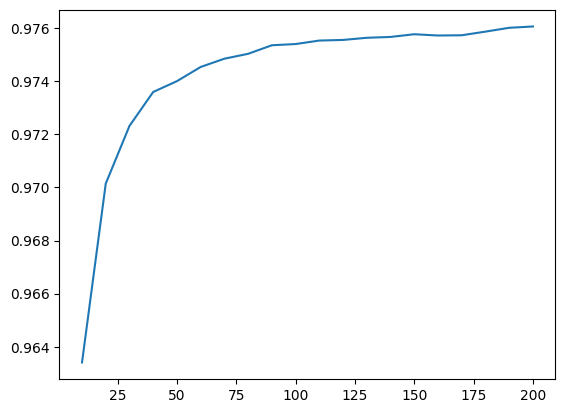

In [107]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

#### Random forest model tuning

In [108]:
scores = []

for d in [5, 10, 15, 20, 25, None]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=11)
        rf.fit(X_train_enc, y_train)

        y_pred = rf.predict_proba(X_val_enc)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [109]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

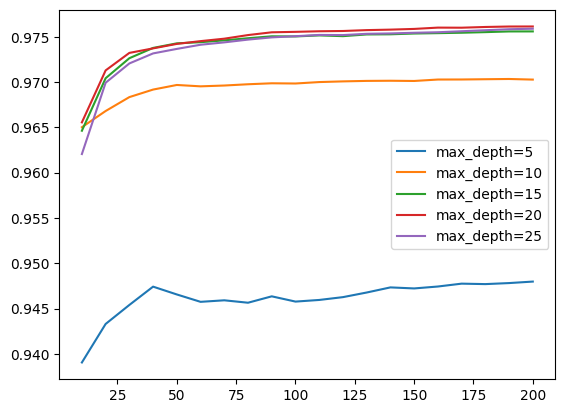

In [110]:
for d in [5, 10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()
plt.show()

In [111]:
max_depth = 20

In [112]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=11)
        rf.fit(X_train_enc, y_train)

        y_pred = rf.predict_proba(X_val_enc)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [113]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

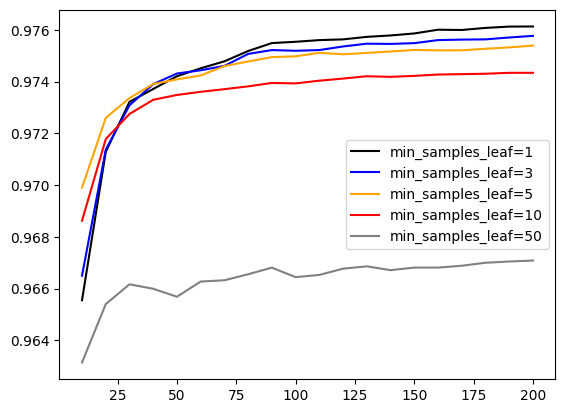

In [114]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.show()

In [115]:
min_samples_leaf = 1

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=11)
rf.fit(X_train_enc, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [116]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv_lr.transform(test_dict)

In [117]:
y_test_pred = rf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_pred)
print(test_auc)

0.9752805165493195


In [118]:
y_pred_label = (y_test_pred >= 0.5).astype(int)
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4495
           1       0.92      0.93      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [119]:
print(confusion_matrix(y_test, y_pred_label))

[[4052  443]
 [ 410 5095]]


In [120]:
importances = rf.feature_importances_
feature_names = dv_lr.get_feature_names_out()

feat_imp = sorted(zip(importances, feature_names), reverse=True)
for score, name in feat_imp[:20]:
    print(name, score)

credit_score 0.21155642385323284
debt_to_income_ratio 0.169786060869518
credit_history_years 0.0659489032921971
interest_rate 0.06397830277935208
delinquencies_last_2yrs 0.05581585585058412
loan_to_income_ratio 0.044614686283859395
age 0.04323165519447861
payment_to_income_ratio 0.04232624748146861
defaults_on_file 0.04154049177838334
years_employed 0.03695357651779039
current_debt 0.03599002301215068
savings_assets 0.03039973290230997
annual_income 0.030109786431752234
loan_amount 0.027982510622591973
loan_intent=Education 0.018332079706349733
loan_intent=Debt Consolidation 0.01712112708041129
derogatory_marks 0.014490268053259576
product_type=Credit Card 0.010718841550139318
loan_intent=Business 0.008942306645367333
loan_intent=Personal 0.007819106018451767


In [121]:
best_auc = 0
best_params = None

for d in [5, 10, 15, 20, 25, None]:
    for s in [1, 3, 5, 10, 50]:
        for n in range(50, 301, 50):

            model = RandomForestClassifier(
                n_estimators=n,
                max_depth=d,
                min_samples_leaf=s,
                random_state=11,
                n_jobs=-1
            )
            
            model.fit(X_train_enc, y_train)
            y_pred = model.predict_proba(X_val_enc)[:, 1]
            auc = roc_auc_score(y_val, y_pred)

            if auc > best_auc:
                best_auc = auc
                best_params = (d, s, n)

best_params, best_auc

((20, 1, 250), 0.9762702326431932)

#### Random forest best model

In [122]:
df_final_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_final = df_final_train.loan_status.values
X_final = df_final_train.drop(columns=['customer_id','loan_status'])

In [123]:
dv_final = DictVectorizer(sparse=False)
final_dict = X_final[categorical + numerical].to_dict(orient='records')
X_final_enc = dv_final.fit_transform(final_dict)

In [124]:
model_rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=20,
    min_samples_leaf=1,
    random_state=11,
    n_jobs=-1
)

model_rf.fit(X_final_enc, y_final)

,n_estimators,250
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Evaluation best random forest model in evaluation set

In [125]:
test_final_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test_enc_final = dv_final.transform(test_final_dict)

# Prediction
y_test_pred = model_rf.predict_proba(X_test_enc_final)[:, 1]
y_pred_label = (y_test_pred >= 0.5).astype(int)

# Metrics
print("AUC:", roc_auc_score(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_label))
print("F1 Score:", f1_score(y_test, y_pred_label))
print(classification_report(y_test, y_pred_label))
print(confusion_matrix(y_test, y_pred_label))

AUC: 0.9764169290936847
Accuracy: 0.914
F1 Score: 0.9220449601160261
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4495
           1       0.92      0.92      0.92      5505

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[4054  441]
 [ 419 5086]]


#### CatBoost model

In [126]:
X_train_cb = df_train.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)
X_val_cb = df_val.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)
X_test_cb = df_test.drop(columns=['customer_id', 'loan_status']).reset_index(drop=True)

In [127]:
cat_features = ['occupation_status', 'defaults_on_file', 'product_type', 'loan_intent']

In [128]:
for c in cat_features:
    X_train_cb[c] = X_train_cb[c].astype(str)
    X_val_cb[c] = X_val_cb[c].astype(str)
    X_test_cb[c] = X_test_cb[c].astype(str)

In [129]:
model_cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    random_seed=11,
    verbose=100
)

In [130]:
model_cb.fit(X_train_cb, y_train, cat_features=cat_features, eval_set=(X_val_cb, y_val))

0:	test: 0.8952004	best: 0.8952004 (0)	total: 201ms	remaining: 1m 40s
100:	test: 0.9842768	best: 0.9842768 (100)	total: 13.2s	remaining: 52.2s
200:	test: 0.9854169	best: 0.9854621 (188)	total: 25.6s	remaining: 38.1s
300:	test: 0.9854618	best: 0.9855090 (240)	total: 38.1s	remaining: 25.2s
400:	test: 0.9854451	best: 0.9855707 (356)	total: 50.9s	remaining: 12.6s
499:	test: 0.9853335	best: 0.9855707 (356)	total: 1m 3s	remaining: 0us

bestTest = 0.9855706866
bestIteration = 356

Shrink model to first 357 iterations.


In [131]:
y_pred_cb = model_cb.predict(X_test_cb)
y_pred_proba_cb = model_cb.predict_proba(X_test_cb)[:, 1]

In [132]:
print("CatBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("F1 Score:", f1_score(y_test, y_pred_cb))
print("AUC:", roc_auc_score(y_test, y_pred_proba_cb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cb))

CatBoost Metrics:
Accuracy: 0.9317
F1 Score: 0.9383852052322958
AUC: 0.9857120081956035

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4495
           1       0.93      0.94      0.94      5505

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
 [[4116  379]
 [ 304 5201]]


#### Best model

In [133]:
models = {
    "Random Forest": model_rf,       # RF final
    "Logistic Regression": model_lr, # LR final
    "CatBoost": model_cb             # CatBoost final
}

for name, model in models.items():
    # Pilih X_test sesuai model
    if name == "Logistic Regression":
        X_test_input = X_test_scaled  # scaled
    elif name == 'Random Forest':
        X_test_input = X_test_enc_final
    else:  
        X_test_input = X_test_cb # RF & CatBoost one-hot / encoded

    y_pred = model.predict(X_test_input)
    y_proba = model.predict_proba(X_test_input)[:, 1]

    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))

    # Classification report lengkap
    report = classification_report(y_test, y_pred, digits=4)
    print("Classification Report:\n", report)
    
    # Confusion matrix pakai pandas supaya gampang scroll
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])
    print("Confusion Matrix:\n", cm_df)
    print("\n")

=== Random Forest ===
Accuracy: 0.9139
F1 Score: 0.9219472395974979
AUC: 0.9764169290936847
Classification Report:
               precision    recall  f1-score   support

           0     0.9061    0.9019    0.9040      4495
           1     0.9202    0.9237    0.9219      5505

    accuracy                         0.9139     10000
   macro avg     0.9132    0.9128    0.9130     10000
weighted avg     0.9139    0.9139    0.9139     10000

Confusion Matrix:
       0     1
0  4054   441
1   420  5085


=== Logistic Regression ===
Accuracy: 0.8661
F1 Score: 0.8791625304575399
AUC: 0.9448449634723819
Classification Report:
               precision    recall  f1-score   support

           0     0.8567    0.8432    0.8499      4495
           1     0.8736    0.8848    0.8792      5505

    accuracy                         0.8661     10000
   macro avg     0.8651    0.8640    0.8645     10000
weighted avg     0.8660    0.8661    0.8660     10000

Confusion Matrix:
       0     1
0  3790   70

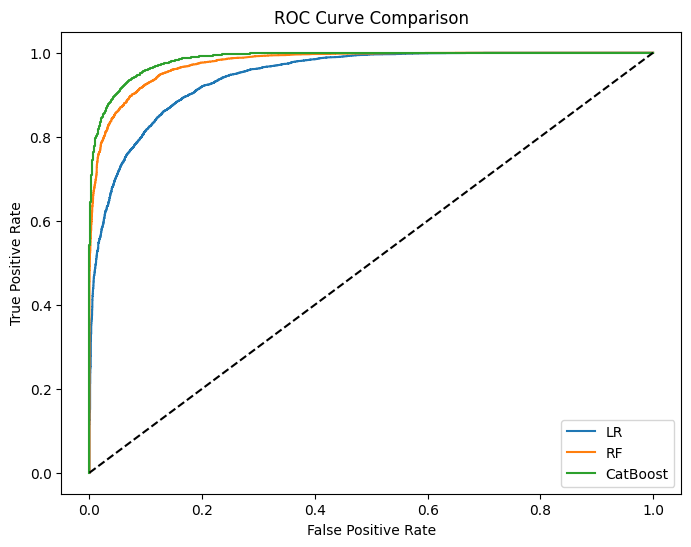

In [134]:
plt.figure(figsize=(8,6))
for name, model, X_input in [("LR", model_lr, X_test_scaled),
                              ("RF", model_rf, X_test_enc_final),
                              ("CatBoost", model_cb, X_test_cb)]:
    y_proba = model.predict_proba(X_input)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()